# 第8章 自相关

1. 时间序列的处理
2. 残差图
3. BG检验
4. Q检验
5. DW检验
6. HAC稳健标准误
7. 处理一阶自相关的FGLS

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 读取数据
ts = pd.read_stata('../2_Data/Data-2e/icecream.dta')
x = ts['time']
y1 = ts['consumption']
y2 = ts['temp']
# 获得ts的行数



30

### 2.画图

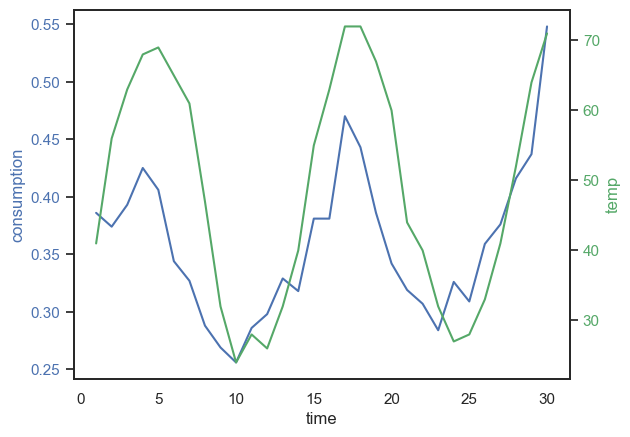

In [2]:
sns.set_theme(
    # context='talk', 
    style="white"
    )  # 设置seaborn的风格

# 创建一个图形
fig, ax1 = plt.subplots()
# 使用seaborn绘制第一个数据集
sns.lineplot(x=x, y=y1, ax=ax1, color="b")  # ax1 作为关键字参数
# 创建第二个y轴
ax2 = ax1.twinx()
# 使用seaborn绘制第二个数据集
sns.lineplot(x=x, y=y2, ax=ax2, color="g")  # ax2 作为关键字参数

# 设置标签
ax1.set_xlabel('time')
ax1.set_ylabel('consumption', color="b")  # Y1轴的标签和刻度标签颜色
ax1.tick_params(axis='y', labelcolor="b")  # Y1轴的刻度标签颜色
ax2.set_ylabel('temp', color="g")  # Y2轴的标签和刻度标签颜色
ax2.tick_params(axis='y', labelcolor="g")  # Y2轴的刻度标签颜色

In [3]:
X = ts[['temp','price','income']]
y = ts['consumption']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     22.17
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           2.45e-07
Time:                        15:21:52   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1973      0.270      0.730      0.4

#### 时间序列处理

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     4.801
Date:                Sun, 21 Apr 2024   Prob (F-statistic):             0.0373
Time:                        16:01:32   Log-Likelihood:                 60.858
No. Observations:                  29   AIC:                            -117.7
Df Residuals:                      27   BIC:                            -115.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.006     -0.238      0.8

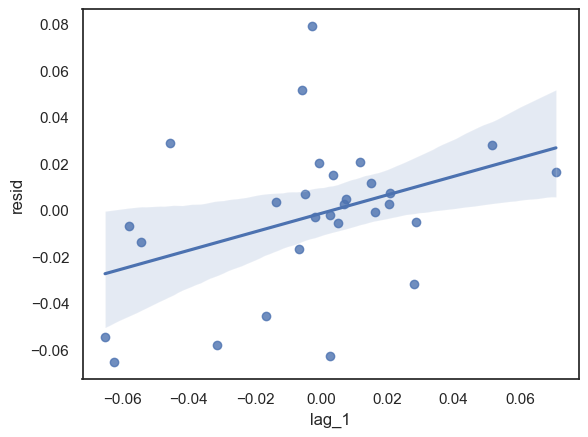

In [16]:
ts_resid = ts.copy()
ts_resid['resid'] = results.resid
# ts_resid['lag_resid'] = results.resid.shift(1)
ts_resid['lag_1']=ts_resid['resid'].shift(1)
ts_resid = ts_resid.dropna()

# 对 resid = beta0 + beta1*lag_1 + epsilon 进行回归
X = ts_resid['lag_1']
y = ts_resid['resid']
X = sm.add_constant(X)
emodel = sm.OLS(y,X)
eresults = emodel.fit()
sns.regplot(y='resid', x='lag_1', data=ts_resid)
print(eresults.summary())

                            OLS Regression Results                            
Dep. Variable:                  resid   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                   0.02728
Date:                Sun, 21 Apr 2024   Prob (F-statistic):              0.870
Time:                        16:01:39   Log-Likelihood:                 53.667
No. Observations:                  27   AIC:                            -103.3
Df Residuals:                      25   BIC:                            -100.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.007     -0.444      0.6

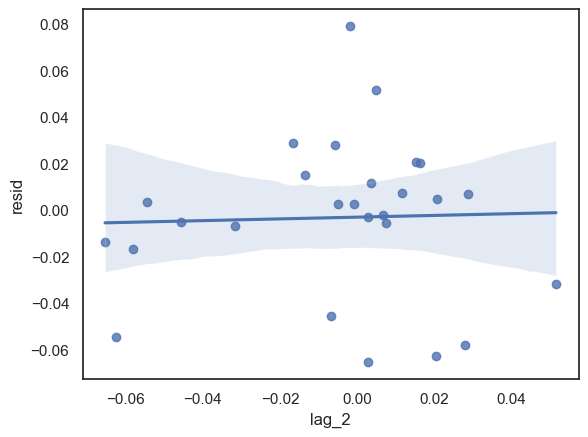

In [17]:
# 对 resid = beta0 + beta1*lag_2 + epsilon 进行回归
ts_resid['lag_2']=ts_resid['resid'].shift(2)
ts_resid = ts_resid.dropna()
X = ts_resid['lag_2']
y = ts_resid['resid']
X = sm.add_constant(X)
emodel = sm.OLS(y,X)
eresults = emodel.fit()
sns.regplot(y='resid', x='lag_2', data=ts_resid)
print(eresults.summary())


#### 残差自相关图

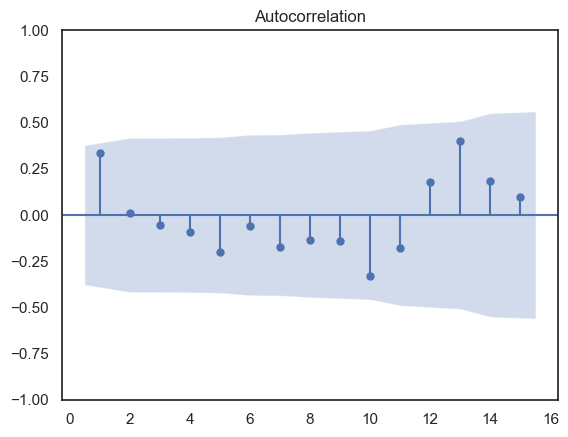

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(y, ax=plt.gca(),zero=False,lags=15)
plt.show()

### 3.BG检验

In [19]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

lag = 1  # 假设我们检验1阶自相关
bg_result = acorr_breusch_godfrey(results, nlags=1)
print("BG检验的LM统计量:{:.4f}".format(bg_result[0]))
print("BG检验的LM统计量P值:{:.4f}".format(bg_result[1]))
if bg_result[1]<0.05:
    print("拒绝原假设,模型存在自相关.")
else:
    print("接受原假设，模型不存在自相关.")

# print("BG检验的F统计量为:{:.4f}".format(bg_result[2]))
# print("BG检验的F统计量P值:{:.4f}".format(bg_result[3]))
# if bg_result[3]<0.05:
#     print("拒绝原假设,模型存在自相关")
# else:
#     print("接受原假设，模型不存在自相关")

BG检验的LM统计量:4.2371
BG检验的LM统计量P值:0.0396
拒绝原假设,模型存在自相关.


### 4.Q检验

In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox

bp_result = acorr_ljungbox(results.resid, 
                           lags=[i for i in range(1, 14)],
                           boxpierce=True, 
                           return_df=True,
                           # auto_lag=True
                           )
bp_result

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,3.600000,0.057780,3.262500,0.070881
2,3.645048,0.161617,3.301917,0.191866
3,3.649399,0.301896,3.305588,0.346866
4,3.971467,0.409881,3.567269,0.467724
5,7.870307,0.163530,6.613237,0.251029
6,9.564491,0.144231,7.883875,0.246735
7,12.346118,0.089736,9.883170,0.195291
8,13.168659,0.106177,10.448666,0.234936
9,13.657982,0.135022,10.769785,0.291820
10,16.371766,0.089473,12.465900,0.255084


### 5.DW检验

In [22]:
# 调用
dw = sm.stats.durbin_watson(results.resid)
print("Durbin-Watson statistic:", dw)

Durbin-Watson statistic: 1.0211693125331998


### 6.HAC标准误

验证模型存在自相关后，可采用HAC方法处理。

In [43]:
nw_cov_type = 'HAC'
p = int((len(ts)** 0.25 // 1) + 1)
nw_kwargs = {'maxlags': p,'use_correction':True}
nw_res = results.get_robustcov_results(cov_type=nw_cov_type, use_t=False, **nw_kwargs)
print(nw_res.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     27.63
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           3.02e-08
Time:                        00:24:53   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1973      0.338      0.584      0.5

## 7.处理一阶自相的FGLS

将截断参数扩大至6，然后对标准差进行对比，发现变化不大。
- 由于 存在自相关，OLS不再是BLUE，所以可考虑使用FGLS来实现。

In [45]:
nw_cov_type = 'HAC'
nw_kwargs = {'maxlags': 6,'use_correction':True}
nw_res = results.get_robustcov_results(cov_type=nw_cov_type, use_t=False, **nw_kwargs)
print(nw_res.summary())

                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     52.97
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           3.28e-11
Time:                        00:25:52   Log-Likelihood:                 58.619
No. Observations:                  30   AIC:                            -109.2
Df Residuals:                      26   BIC:                            -103.6
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1973      0.330      0.598      0.5

In [63]:
# 使用CO方法 需要不停的迭代

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# 读取原始数据
icecream = pd.read_stata('../2_Data/Data-2e/icecream.dta')
X = icecream[['temp','price','income']]
y = icecream['consumption']
X = sm.add_constant(X)

# 初始OLS回归
model = sm.OLS(y,X)
results = model.fit()

# 检查模型是否有自相关
print("Durbin-Watson统计量:{}".format(sm.stats.durbin_watson(results.resid)))
print("Breusch-Godfrey统计量p值:{}".format(acorr_breusch_godfrey(results,1)[1]))

# Cochrane-Orcutt迭代过程
converged = False
iterations = 0
max_iterations = 15  # 设置最大迭代次数
tolerance = 0.001  # 设置收敛容差


while not converged and iterations < max_iterations:
    # 拟合AR(1)模型来估计自相关系数
    # 取epsilon_ols的滞后值作为自相关系数
    epsilon_ols = results.resid
    X = epsilon_ols.shift(1).dropna()
    y = epsilon_ols[1:]
    rho = sm.OLS(y, X).fit()
    rho_ar = rho.params[0]

    # 使用Cochrane-Orcutt变换调整误差项
    X_adj = X.copy() - X.copy().shift(1)*rho_ar
    y_adj = y.copy() - y.copy().shift(1)*rho_ar
    # 重新进行OLS回归
    results_new = sm.OLS(y_adj[1:], sm.add_constant(X_adj[1:])).fit()

    # 检查是否收敛
    if abs(rho_ar) < tolerance:
        converged = True
    else:
        results = results_new  # 更新模型为新迭代的结果
        iterations += 1
        print(f"迭代 {iterations}, 自相关系数: {rho_ar}, Breusch-Godfrey统计量p值{acorr_breusch_godfrey(results,1)[1]}:")

print(results.summary())


Durbin-Watson统计量:1.0211693125331998
Breusch-Godfrey统计量p值:0.03955039541604021
迭代 1, 自相关系数: 0.4006327583280341, Breusch-Godfrey统计量p值0.5936359293503071:
迭代 2, 自相关系数: 0.0162875691665162, Breusch-Godfrey统计量p值0.784253526869077:
迭代 3, 自相关系数: 0.01021648500949744, Breusch-Godfrey统计量p值0.1870912054373272:
迭代 4, 自相关系数: -0.1513733922617283, Breusch-Godfrey统计量p值0.7143242078038774:
迭代 5, 自相关系数: -0.027724064322070866, Breusch-Godfrey统计量p值0.5832118789653511:
迭代 6, 自相关系数: -0.00901791588684979, Breusch-Godfrey统计量p值0.46911346182546154:
迭代 7, 自相关系数: -0.00882761737484012, Breusch-Godfrey统计量p值0.3334836793376274:
迭代 8, 自相关系数: -0.002446269907715487, Breusch-Godfrey统计量p值0.13894503137750056:
迭代 9, 自相关系数: 0.04529755534940559, Breusch-Godfrey统计量p值0.48241620189926837:
迭代 10, 自相关系数: 0.0626709164519641, Breusch-Godfrey统计量p值0.5147337161548637:
迭代 11, 自相关系数: -0.24345256421997552, Breusch-Godfrey统计量p值0.0638095806480656:
迭代 12, 自相关系数: -0.2987454909480707, Breusch-Godfrey统计量p值0.16689572264036012:
迭代 13, 自相关系数: -0.65735410

C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_25596\2350164424.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho_ar = rho.params[0]
C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_25596\2350164424.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho_ar = rho.params[0]
C:\Users\NINGMEI\AppData\Local\Temp\ipykernel_25596\2350164424.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rho_ar = rho.params[0]
C:\Users\NINGMEI\Ap

ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal